# Welcome to your first assignment of the SSL lecture

We are very glad, that you took the first step and opened this Jupyter Notebook successfully.

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry. We need you to upload the .ipynb-file and the exported .pdf of this notebook.

This and all the upcoming assignment notebooks will guide you (more or less) through the tasks we want you to solve. You sometimes will find some code snippets, which may help you to solve the tasks. But you are also free to implement your own functions, if you want to.

For the first week we want you implement and train a simple neural network with backpropagation, just like we did in the lecture. If you have any questions, ask them in either in the tutorials or in the "Mattermost" channel: https://mattermost.imp.fu-berlin.de/biorobotics/channels/ssl_ws_2324

The Exercise description states the **RESULT** we will grade.

## Slide Review

[Google Form](https://forms.gle/MstgymkWzPcWDFCa7) for the slide review. Please take one minute to scroll over the slides again and improve your lecture.

#### Please state both names of your group members here:
Authors: Can Aydin and Omar Hany Abdelmonem Hamed Ahmed

# Assignment 1: Backpropagation
We recommend you read the chapter 7.3.3 of the Rojas book (https://www.inf.fu-berlin.de/inst/ag-ki/rojas_home/documents/1996/NeuralNetworks/neuron.pdf), and learn about the "matrix way" of implementing backprop.

## Ex. 1.1 XOR
Implement a two-layer artificial neural network with two input neurons and one output neuron. Choose the number of hidden neurons to your liking. Our goal is to learn the [XOR gate](https://en.wikipedia.org/wiki/XOR_gate). What does the untrained network (= random weights) return for all (four) combinations of inputs? **(RESULT)**

In [8]:
import numpy as np
import seaborn as sns
import pandas as pd

# model with two hidden layers á 4 neurons

weight_matrix_1 = np.array(np.random.rand(2, 4), dtype=np.float128)
weight_matrix_2 = np.array(np.random.rand(4, 4), dtype=np.float128)
weight_matrix_3 = np.array(np.random.rand(4, 1), dtype=np.float128)

bias_nodes_1 = np.array(np.random.rand(1, 4), dtype=np.float128)
bias_nodes_2 = np.array(np.random.rand(1, 4), dtype=np.float128)
bias_nodes_3 = np.array(np.random.rand(1, 1), dtype=np.float128)


def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def forward_pass(x0, x1):
    global weight_matrix_1, weight_matrix_2, weight_matrix_3
    input_vector = [x0, x1]

    h1 = np.dot(input_vector, weight_matrix_1) + bias_nodes_1
    s1 = np.array([sigmoid(x) for x in h1])

    h2 = np.dot(s1, weight_matrix_2) + bias_nodes_2
    s2 = np.array([sigmoid(x) for x in h2])
    h3 = np.dot(s2, weight_matrix_3) + bias_nodes_3
    s3 = sigmoid(h3)

    output = s3[0][0]

    return output, h1, h2, h3, s1, s2

for d1, d2 in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    out,h1,h2,h3,s1,s2 = forward_pass(d1, d2)
    print("Input [{},{}]: {}".format(d1, d2, out))

Input [0,0]: 0.7846045367059171
Input [0,1]: 0.7908037573533523
Input [1,0]: 0.7901832529374861
Input [1,1]: 0.7941400331927021


## Ex. 1.2 Backpropagation
Implement Backpropagation and optimize the weights of your neural network using the XOR training set:

### x, y

(0,0), 0

(0,1), 1

(1,0), 1

(1,1), 0

How many training iterations do you need? Plot the network error over the number of iterations! **(RESULT)**

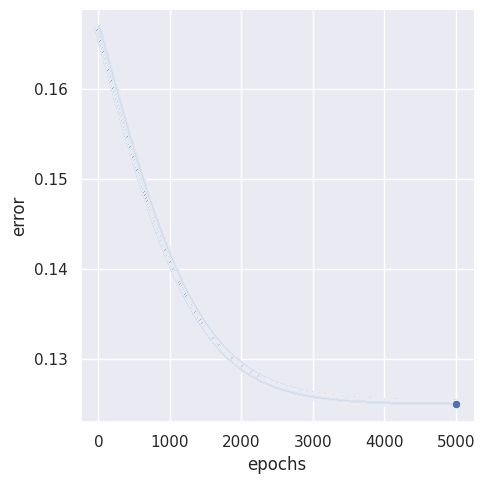

In [9]:
def derivative_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

def backward_pass(x1, x2, h1, h2, h3):
    inp = np.array([[x1, x2]])
    delta_output_neuron = derivative_sigmoid(h3)

    derivative_3 = np.array([derivative_sigmoid(x) for x in h2.T])
    delta_layer_3 = np.multiply(derivative_3, (np.dot(delta_output_neuron, weight_matrix_3.T).T))

    derivative_2 = np.array([derivative_sigmoid(x) for x in h1.T])
    delta_layer_2 = np.multiply(derivative_2, (np.dot(delta_layer_3.T, weight_matrix_2.T).T))

    derivative_1 = np.array([derivative_sigmoid(x) for x in inp])
    delta_layer_1 = np.multiply(derivative_1.T, (np.dot(delta_layer_2.T, weight_matrix_1.T)).T)

    return delta_layer_1, delta_layer_2, delta_layer_3, delta_output_neuron


xor_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
xor_ground_truth = [0, 1, 1, 0]

#print(backward_pass(1, 1, h1, h2, h3))

def gradient_descent(data, ground_truth, epochs=1, learning_rate=1):
    error_per_epoch = []
    global weight_matrix_1, weight_matrix_2, weight_matrix_3
    for epoch in range(epochs):
        error = 0
        gradient_layer_3 = np.zeros((4,1))
        gradient_layer_2 = np.zeros((4,4))
        gradient_layer_1 = np.zeros((2,4))
        for (data0, data1), y_T in zip(data, ground_truth):
            output, h1, h2, h3, s1, s2 = forward_pass(data0, data1)

            delta_layer_1, delta_layer_2, delta_layer_3, delta_output_neuron = backward_pass(data0, data1, h1, h2, h3)

            gradient_layer_3 = gradient_layer_3 + np.dot((np.full((4,1), output) - np.full((4,1), y_T)).T, np.dot(np.full((4,1), delta_output_neuron), s2)).T

            gradient_layer_2 = gradient_layer_2 + np.dot((np.full((4,4), output) - np.full((4,4), y_T)).T, np.dot(delta_layer_3, s1)).T

            gradient_layer_1 = gradient_layer_1 + np.dot((np.full((4,2), output) - np.full((4,2), y_T)).T, np.dot(delta_layer_2, s1))

            error += 0.5 * (y_T - output)**2

        # normalize the gradients
        p = len(ground_truth)
        gradient_layer_1 /= p
        gradient_layer_2 /= p
        gradient_layer_3 /= p
        error /= p
        error_per_epoch.append(error)
        # gradient descent step
        weight_matrix_1 = weight_matrix_1 - learning_rate * gradient_layer_1
        weight_matrix_2 = weight_matrix_2 - learning_rate * gradient_layer_2
        weight_matrix_3 = weight_matrix_3 - learning_rate * gradient_layer_3

    return error_per_epoch

epochs = 5000
error_per_epoch = gradient_descent(xor_data, xor_ground_truth, epochs=epochs, learning_rate=0.001)

plt = pd.DataFrame(data={'error': error_per_epoch, "epochs": range(epochs)})
sns.set_theme()

# Load an example dataset
sns.relplot(
    data=plt,
    x="epochs", y="error",
)


In [3]:
out,_,_,_,_,_ = forward_pass(1, 0)
print(out)

0.50789264747562513485


# Ex. 1.3 MNIST (BONUS)
Train your network on the MNIST dataset and state the model accuracy (or the model error) for the training and test sets. **(RESULT)** You can download the dataset using the [PyTorch library](https://pytorch.org/vision/0.15/generated/torchvision.datasets.MNIST.html).

Compare your results to this [list](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354).


##Neural Network Class


In [64]:
import numpy as np
import torchvision
from torchvision import transforms

class NeuralNetwork:
    def __init__(self):
        # Initialize the model's parameters
        self.weight_matrix_1 = np.array(np.random.rand(784, 128), dtype=np.float128)
        self.weight_matrix_2 = np.array(np.random.rand(128, 64), dtype=np.float128)
        self.weight_matrix_3 = np.array(np.random.rand(64, 10), dtype=np.float128)  # 10 classes for MNIST
        self.bias_nodes_1 = np.array(np.random.rand(1, 128), dtype=np.float128)
        self.bias_nodes_2 = np.array(np.random.rand(1, 64), dtype=np.float128)
        self.bias_nodes_3 = np.array(np.random.rand(1, 10), dtype=np.float128)

    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))

    def forward_pass(self, x):
        input_vector = x
        h1 = np.dot(input_vector, self.weight_matrix_1) + self.bias_nodes_1
        s1 = np.array([self.sigmoid(x) for x in h1])

        h2 = np.dot(s1, self.weight_matrix_2) + self.bias_nodes_2
        s2 = np.array([self.sigmoid(x) for x in h2])
        h3 = np.dot(s2, self.weight_matrix_3) + self.bias_nodes_3
        s3 = h3
        output = s3

        return output, h1, h2, h3, s1, s2

    def derivative_sigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def backward_pass(self, x, y, h1, h2, h3):
        delta_output_neuron = -(y - x)

        delta_layer_3 = delta_output_neuron
        delta_layer_2 = np.multiply(delta_layer_3.dot(self.weight_matrix_3.T), self.derivative_sigmoid(h2))
        delta_layer_1 = np.multiply(delta_layer_2.dot(self.weight_matrix_2.T), self.derivative_sigmoid(h1)).T

        return delta_layer_1, delta_layer_2, delta_layer_3, delta_output_neuron

    def gradient_descent(self, data, ground_truth, epochs, learning_rate):
        error_per_epoch = []
        for epoch in range(epochs):
            error = 0
            gradient_layer_3 = np.zeros((64, 10))
            gradient_layer_2 = np.zeros((128, 64))
            gradient_layer_1 = np.zeros((784, 128))

            for x, y in zip(data, ground_truth):
                output, h1, h2, h3, s1, s2 = self.forward_pass(x)

                delta_layer_1, delta_layer_2, delta_layer_3, delta_output_neuron = self.backward_pass(output, y, h1, h2, h3)

                gradient_layer_3 = gradient_layer_3 + delta_layer_3.T.dot(s2).T
                gradient_layer_2 = gradient_layer_2 + delta_layer_2.T.dot(s1).T
                gradient_layer_1 = gradient_layer_1 + x.reshape(-1, 1).dot(delta_layer_1)

                error += 0.5 * np.mean((y - output) ** 2)

            # normalize the gradients
            p = len(ground_truth)
            gradient_layer_1 /= p
            gradient_layer_2 /= p
            gradient_layer_3 /= p
            error /= p
            error_per_epoch.append(error)
            # gradient descent step
            self.weight_matrix_1 = self.weight_matrix_1 - learning_rate * gradient_layer_1
            self.weight_matrix_2 = self.weight_matrix_2 - learning_rate * gradient_layer_2
            self.weight_matrix_3 = self.weight_matrix_3 - learning_rate * gradient_layer_3

        return error_per_epoch



In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [65]:
network = NeuralNetwork()

learning_rate = 0.001
num_epochs = 10

for epoch in range(num_epochs):
    for inputs, labels in trainloader:
        inputs = inputs.view(inputs.size(0),-1)
        inputs = inputs.numpy()
        labels = labels.numpy()

        outputs, h1, h2, h3, s1, s2 = network.forward_pass(inputs)

        one_hot_labels = np.zeros((len(labels), 10))
        one_hot_labels[np.arange(len(labels)), labels] = 1

        delta_layer_1, delta_layer_2, delta_layer_3, delta_output_neuron = network.backward_pass(outputs, one_hot_labels, h1, h2, h3)

        network.gradient_descent(inputs, one_hot_labels, epochs=1, learning_rate=learning_rate)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {error_per_epoch[-1]}')

network.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs = inputs.numpy()
        labels = labels.numpy()
        outputs, _, _, _, _, _ = network.forward_pass(inputs)
        predicted = np.argmax(outputs, axis=1)
        total += labels.shape[0]
        correct += (predicted == labels).sum()

print(f'Accuracy: {100 * correct / total}%')



ValueError: ignored